# Phase 1 Project Potential Aircraft Risks Analysis

## Business Problem Statement

- My company is expanding in to new industries to diversify its portfolio. 
- Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft.
- I am charged with determining which aircraft are the lowest risk for the company to start this new business endeavor.
- I must then translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## The Data Overview

1. The dataset is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.
2. I shall analyse and use the data to make actionable insights to aid in the aircraft purchase decision

In [1]:
# importing required project libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the aviation dataset to the df dataframe
df = pd.read_csv('./Data/Aviation_Data.csv')

C:\Users\david.mnene\AppData\Local\Temp\ipykernel_202404\1151442054.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Data/Aviation_Data.csv')


In [3]:
#checking the overal number of rows and columns
df.shape

(90348, 31)

In [4]:
#load first five records to get a glimpse view of the data 
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
#confirming the column data type of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

BASE ITEMS FOR RECOMENDATIONS:
1. MAKE
2. MODEL
3. Aircraft.Category

FILTER BY COLUMNS:
1. Purpose.of.flight
2. Aircraft.Category
3. FAR.Description
4. Amateur.Built >> data set has more amateur built aircrafts tha

COLUMN RISK ANALYSIS(STATISTICAL/CATEGORICAL):
1. Injury.Severity
2. Aircraft.damage
3. Total.Serious.Injuries
4. Total.Minor.Injuries
5. Total.Uninjured
6. Weather.Condition
7. Report.Status #recomendation purposes

NB: research on the data description for the aviation potentials risks

In [6]:
#removing null rows which the make and model column values are both null, since they do not identify an aircraft if they are null
make_model_is_null = df['Make'].isna() & df['Model'].isna()
df_make_model_not_null = df.drop(df[make_model_is_null].index)

In [7]:
#identifying the relevant unique aircrafts category 
df_make_model_not_null['Aircraft.Category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [8]:
#removing unrequired categories, required categories are as per the business need for commercial and private enterprises
required_aicraft_categories = ['Airplane','Helicopter','Powered-Lift','Blimp']
df_required_aircraft_categories = df_make_model_not_null[df_make_model_not_null['Aircraft.Category'].isin(required_aicraft_categories)]

In [9]:
#identifing the relevant_purpose_flight
df_required_aircraft_categories['Purpose.of.flight'].unique()

array([nan, 'Personal', 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Positioning', 'Other Work Use',
       'Flight Test', 'Public Aircraft - Federal', 'Air Race/show',
       'Air Drop', 'Public Aircraft - State', 'Glider Tow', 'Banner Tow',
       'External Load', 'Public Aircraft - Local', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [10]:
#removing unrequired purpose of flight, required purpose are as per the business need for commercial and private enterprises
relevant_purpose_of_flight = ['Personal', 'Business','Executive/corporate']
df_relevant_purpose_of_flight = df_required_aircraft_categories[df_required_aircraft_categories['Purpose.of.flight'].isin(relevant_purpose_of_flight)]

In [11]:
df_relevant_purpose_of_flight['Make'] = df_relevant_purpose_of_flight['Make'].str.strip().str.upper()

C:\Users\david.mnene\AppData\Local\Temp\ipykernel_202404\732909059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant_purpose_of_flight['Make'] = df_relevant_purpose_of_flight['Make'].str.strip().str.upper()


In [12]:
#identifying aircraft makes value counts in order to get most common one's
df_relevant_purpose_of_flight['Make'].value_counts()

Make
CESSNA                    5215
PIPER                     3228
BEECH                     1217
MOONEY                     364
BELLANCA                   225
                          ... 
EMBRAER S A                  1
SCODA AERONAUTICA LTDA       1
SEABOURN SCOTT R             1
MARY ALEXANDER               1
SHIREY DAVID A               1
Name: count, Length: 3186, dtype: int64

In [13]:
#identify the make count distribution  
df_make_counts = df_relevant_purpose_of_flight['Make'].value_counts()

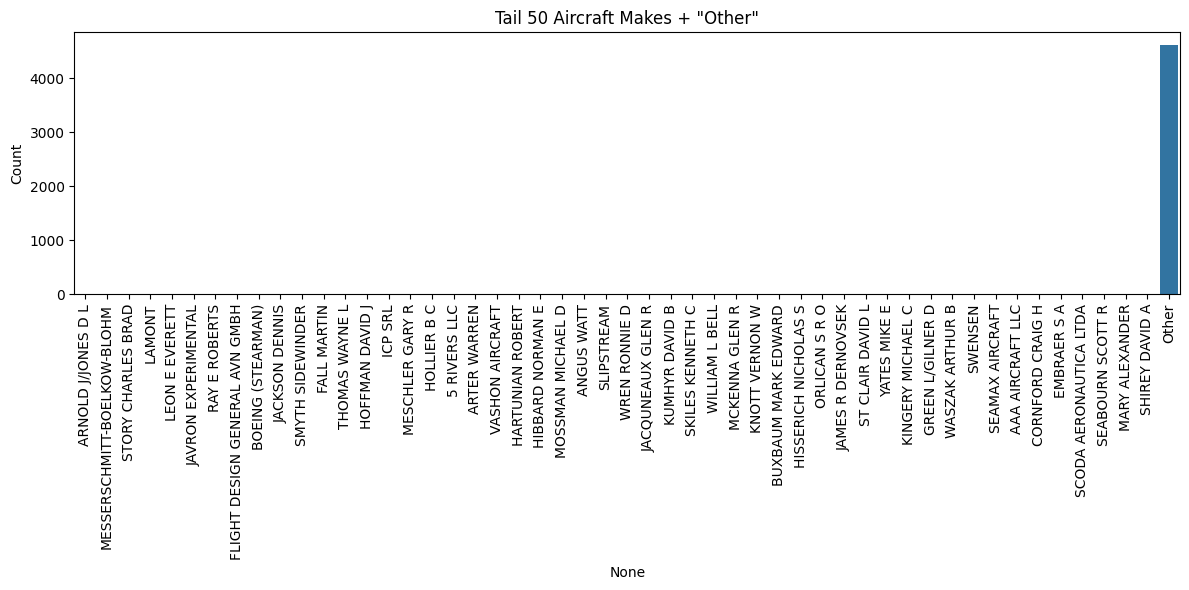

In [14]:
#visualize using barplot the aircraft make distribution from the tail, the ones with the least appearance (rare)
tail_n = 50 
top_makes = df_make_counts.tail(tail_n)
other_count = df_make_counts[tail_n:].sum()

# Combine into a new Series
plot_data = plot_data = pd.concat([top_makes, 
    pd.Series(other_count, index=['Other']) ])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=plot_data.index, y=plot_data.values)
plt.xticks(rotation=90)
plt.title(f'Tail {tail_n} Aircraft Makes + "Other"')
plt.ylabel('Count')
plt.tight_layout()

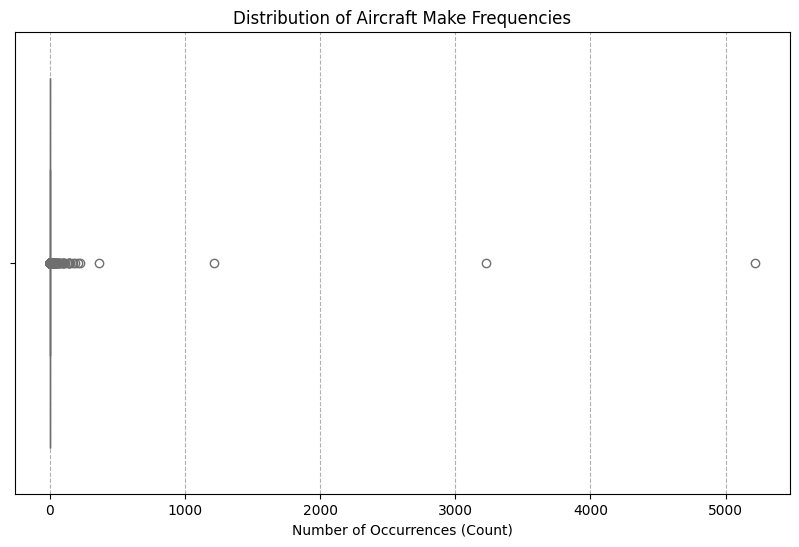

In [15]:
# distribution view of the aircraft makes appearance frequncies
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_make_counts.values, color='skyblue')
plt.title('Distribution of Aircraft Make Frequencies')
plt.xlabel('Number of Occurrences (Count)')
plt.grid(axis='x', linestyle='--')
plt.show()

From the above visulaization, it shows that most of the aircraft makes have a low value count, hence are rare as they appear less than the others, this may skew the data and will require them to be removed.

In [16]:
# # describe the make_count subset in order to make a decision to remove the aircraft makes 
# # that appear less as it means that they are rare and they skew the data
df_make_counts.describe()

count    3186.000000
mean        5.627433
std       111.384836
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      5215.000000
Name: count, dtype: float64

## From the above statitisc it means:
- count	3443.000000	- Total unique aircraft makes in my dataset.
- mean	5.207377 - On average, each make appears ~5 times.
- std	76.531039 -	High standard deviation → Counts vary widely (many rare aircraft makes, a few common).
- min	1.000000 - At least one aircraft make appears only once.
- 25%	1.000000 - 25% of aircraft makes appear once or less (i.e., most appear exactly once).
- 50%	1.000000 - Median aircraft make appears only once → 50% of aircraft makes are singletons.
- 75%	1.000000 - 75% of aircraft makes appear once or less (i.e., almost all are rare).
- max	2940.000000 - The most frequent aircraft make appears 2,940 times.

In [17]:
#Remove makes with counts <50 to reduce noise.
# The column Make will only have the most popular aircraft makes retain their original names, and all others are grouped together as "Other".
threshold = 50
df_relevant_purpose_of_flight = df_relevant_purpose_of_flight.copy()
df_relevant_purpose_of_flight['Make'] = df_relevant_purpose_of_flight['Make'].where(
    df_relevant_purpose_of_flight['Make'].isin(df_make_counts[df_make_counts >= threshold].index), 
    'Other'
)

In [18]:
df_make_counts_after = df_relevant_purpose_of_flight['Make'].value_counts().sort_values(ascending=True)

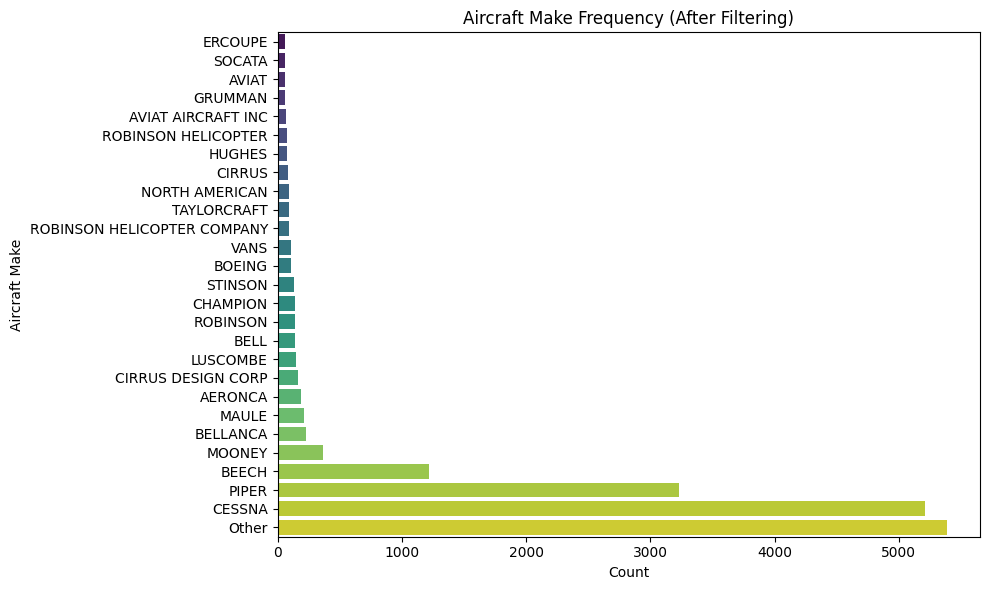

In [19]:
plt.figure(figsize=(10, 6))

# Create the bar plot and explicitly assign a label
ax = sns.barplot(
    y=df_make_counts_after.index,
    x=df_make_counts_after.values,
    hue=df_make_counts_after.index,
    palette="viridis",
    legend=False
)

# Set titles and labels
plt.title('Aircraft Make Frequency (After Filtering)')
plt.xlabel('Count')
plt.ylabel('Aircraft Make')

plt.tight_layout()
plt.show()

In [20]:
df_relevant_purpose_of_flight = df_relevant_purpose_of_flight.copy()
df_relevant_purpose_of_flight['Event.Date'] = pd.to_datetime(df_relevant_purpose_of_flight['Event.Date'])

In [21]:
df_relevant_purpose_of_flight['Publication.Date'] = pd.to_datetime(df_relevant_purpose_of_flight['Publication.Date'],format='%d-%m-%Y')

In [22]:
df_relevant_purpose_of_flight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17935 entries, 7 to 90345
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                17935 non-null  object        
 1   Investigation.Type      17935 non-null  object        
 2   Accident.Number         17935 non-null  object        
 3   Event.Date              17935 non-null  datetime64[ns]
 4   Location                17935 non-null  object        
 5   Country                 17931 non-null  object        
 6   Latitude                15528 non-null  object        
 7   Longitude               15520 non-null  object        
 8   Airport.Code            12139 non-null  object        
 9   Airport.Name            12537 non-null  object        
 10  Injury.Severity         17921 non-null  object        
 11  Aircraft.damage         17851 non-null  object        
 12  Aircraft.Category       17935 non-null  object     

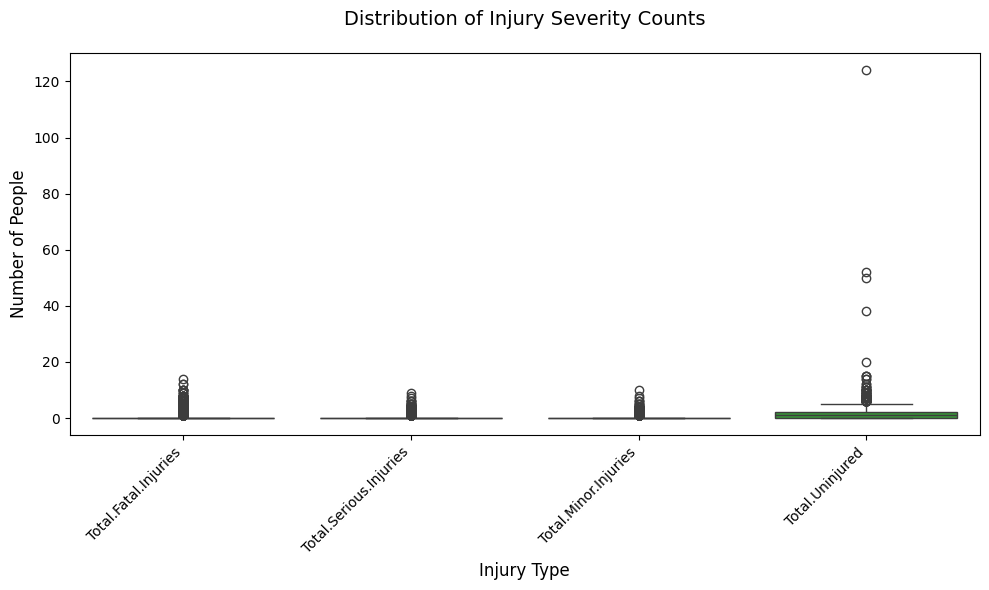

In [23]:
# Melt the data for Seaborn
df_melted = df_relevant_purpose_of_flight.melt(
    value_vars=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 
               'Total.Minor.Injuries', 'Total.Uninjured'],
    var_name='Injury Type', 
    value_name='Count'
)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(
    data=df_melted,
    x='Injury Type',
    y='Count',
    hue='Injury Type',  # Assign hue to x to avoid warning
    palette=['#d62728', '#ff7f0e', '#1f77b4', '#2ca02c'],
    legend=False,       # Disable redundant legend
    ax=ax
)

# Customize the plot
ax.set_title('Distribution of Injury Severity Counts', fontsize=14, pad=20)
ax.set_xlabel('Injury Type', fontsize=12)
ax.set_ylabel('Number of People', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## SURVIVAL RATE NEW COLUMN CREATION
Created a new column called survial rate based on the four measures for fatality Total.Fatal.Injuries, Total.Serious.Injuries, 
Total.Minor.Injuries and Total.Uninjured, given a weightage of 1 to uninjured, 0.8 to minor, 0.3 to serious and 0 to fatal, survival rate formula is based on (Total.Fatal.Injuries*weightage + Total.Serious.Injuries*weightage + Total.Minor.Injuries*weightage + Total.Uninjured*weightage)/ (total number of people from the four listed columns) * 100

In [24]:
# Define weights for injury types
weights = {
    'Uninjured': 1.0,
    'Minor': 0.8,
    'Serious': 0.3,
    'Fatal': 0.0
}

# Calculate weighted survival rate
df_relevant_purpose_of_flight['survival_rate'] = (df_relevant_purpose_of_flight['Total.Uninjured'].fillna(0)*weights['Uninjured'] + 
    df_relevant_purpose_of_flight['Total.Minor.Injuries'].fillna(0)*weights['Minor'] + 
    df_relevant_purpose_of_flight['Total.Serious.Injuries'].fillna(0)*weights['Serious']
) / (
    df_relevant_purpose_of_flight['Total.Uninjured'].fillna(0) + 
    df_relevant_purpose_of_flight['Total.Minor.Injuries'].fillna(0) + 
    df_relevant_purpose_of_flight['Total.Serious.Injuries'].fillna(0) + 
    df_relevant_purpose_of_flight['Total.Fatal.Injuries'].fillna(0)
) * 100

# Handle divide-by-zero and NaN cases
df_relevant_purpose_of_flight['survival_rate'] = np.where(
    (df_relevant_purpose_of_flight['Total.Uninjured'] == 0) & 
    (df_relevant_purpose_of_flight['Total.Minor.Injuries'] == 0) & 
    (df_relevant_purpose_of_flight['Total.Serious.Injuries'] == 0) & 
    (df_relevant_purpose_of_flight['Total.Fatal.Injuries'] == 0),
    np.nan,  # Mark cases with no people as NaN
    df_relevant_purpose_of_flight['survival_rate']
)

# Round to 1 decimal place
df_relevant_purpose_of_flight['survival_rate'] = df_relevant_purpose_of_flight['survival_rate'].round(1)
print(df_relevant_purpose_of_flight[['Total.Fatal.Injuries', 'Total.Serious.Injuries',
                                     'Total.Minor.Injuries', 'Total.Uninjured', 'survival_rate']].head(20))

    Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries  \
7                    0.0                     0.0                   0.0   
8                    0.0                     0.0                   0.0   
12                   0.0                     0.0                   1.0   
13                   1.0                     0.0                   0.0   
14                   1.0                     0.0                   0.0   
15                   2.0                     0.0                   0.0   
16                   0.0                     0.0                   0.0   
17                   3.0                     0.0                   0.0   
18                   0.0                     0.0                   0.0   
19                   0.0                     0.0                   0.0   
21                   0.0                     0.0                   0.0   
23                   0.0                     0.0                   0.0   
24                   2.0              

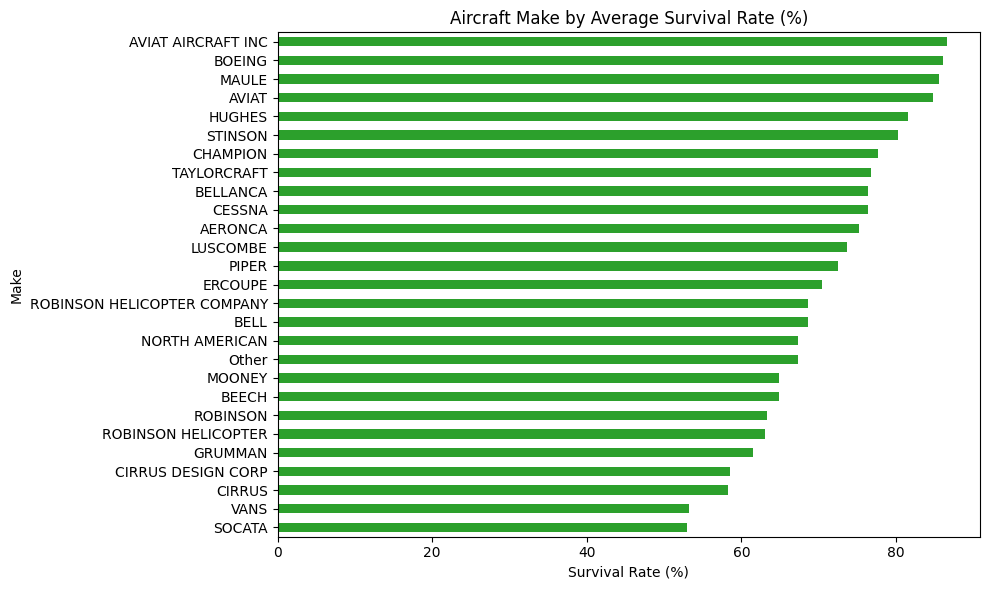

In [25]:
# Plot survival rates by aircraft make
makes_survival = df_relevant_purpose_of_flight.groupby('Make')['survival_rate'].mean().sort_values(ascending=True)
makes_survival.plot(kind='barh', color='#2ca02c', figsize=(10, 6))
plt.title('Aircraft Make by Average Survival Rate (%)')
plt.xlabel('Survival Rate (%)')
plt.tight_layout()
plt.show()

In [26]:
# df_relevant_purpose_of_flight['Weather.Condition'].value_counts()

In [27]:
# top_models = df_relevant_purpose_of_flight.groupby('Make','Model')['survival_rate'].mean().sort_values(ascending=True)
# top_models.plot(kind='barh', color='#2ca02c', figsize=(10, 6))
# plt.title('Top 10 Aircraft Make by Average Survival Rate (%)')
# plt.xlabel('Survival Rate (%)')
# plt.tight_layout()
# plt.show()

## Summary

Recomendation conclusion of the suggested aircrafts from the above analysis